**Exploración de una data base**

El objetivo de este proyecto es desarrollar y comparar distintos modelos de Machine Learning

Se evaluarán múltiples algoritmos de regresión con el fin de identificar cuál presenta
mejor desempeño predictivo y mayor capacidad de generalización.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Exploración de Datos**

Se realiza un análisis exploratorio (EDA) para:

- Comprender la distribución de las variables
- Identificar correlaciones
- Detectar posibles outliers
- Analizar la relación entre variables independientes y el precio de vivienda

X: Coordenada X del punto en el mapa.

Y: Coordenada Y del punto en el mapa.

month: Mes en el que se registró el incendio (abreviado en inglés).

day: Día de la semana en el que se registró el incendio (abreviado en inglés).

FFMC: Fine Fuel Moisture Code - Código de humedad de combustible fino. Es un índice que representa la humedad de los combustibles finos, como hojas secas y ramitas.

DMC: Duff Moisture Code - Código de humedad del mantillo. Es un índice que representa la humedad de la capa de mantillo (hojarasca y material orgánico) en el suelo.

DC: Drought Code - Código de sequía. Es un índice que representa la sequía en capas más profundas del suelo.

ISI: Initial Spread Index - Índice de propagación inicial. Representa la velocidad a la que un fuego puede propagarse en sus primeras etapas.

temp: Temperatura (en grados Celsius) en el momento del registro.

RH: Humedad relativa (en porcentaje) en el momento del registro.

wind: Velocidad del viento (en km/h) en el momento del registro.

rain: Precipitación (en mm) en el momento del registro.

area: Área quemada por el incendio (en hectáreas).

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/BaseDatos/forestfires.csv")

In [ ]:
df.shape

(517, 13)

In [ ]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,1,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,1,1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,1,1,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,2,2,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,1,1,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,2,2,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,1,1,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,2,2,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,2,2,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,2,2,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,1.628627,1.620890,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,0.483640,0.485636,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,2.000000,2.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,2.000000,2.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,2.000000,2.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


**Preprocesamiento de Datos**

- División en conjunto de entrenamiento y prueba.
- Aplicación de normalización cuando el modelo lo requiere.
- Preparación final del dataset para entrenamiento.

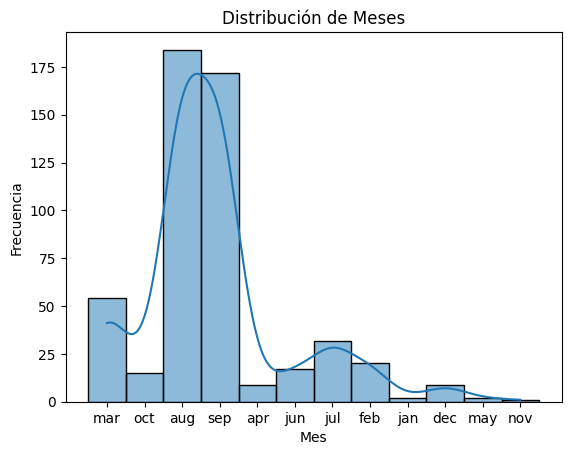

In [ ]:
# Distribución de Meses
sns.histplot(df['month'].dropna(), kde=True)
plt.title('Distribución de Meses')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

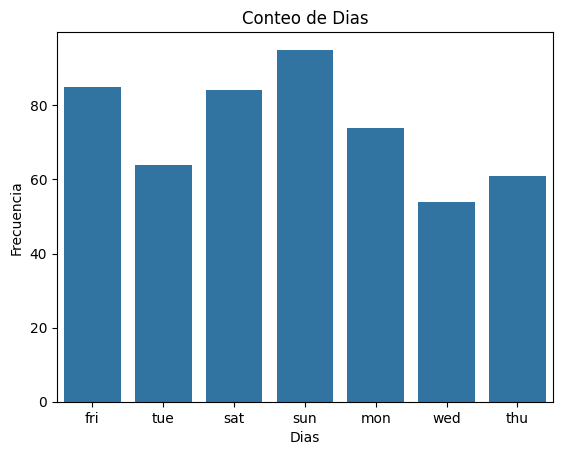

In [ ]:
# Gráfico de barras de Dias
sns.countplot(x='day', data=df)
plt.title('Conteo de Dias')
plt.xlabel('Dias')
plt.ylabel('Frecuencia')
plt.show()

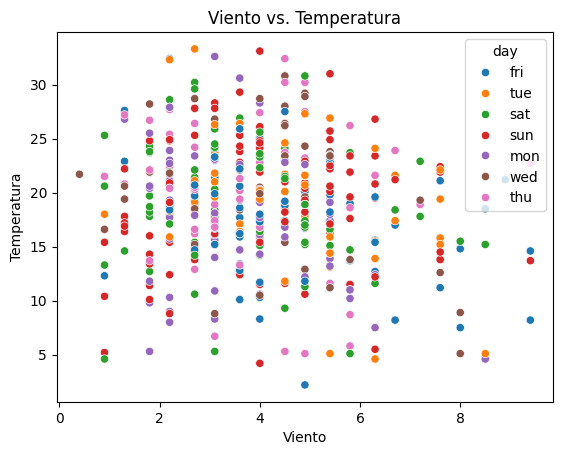

In [ ]:
# Relación entre el Viento y Temperatura con los Dias
sns.scatterplot(x='wind', y='temp', hue='day', data=df)
plt.title('Viento vs. Temperatura')
plt.xlabel('Viento')
plt.ylabel('Temperatura')
plt.show()

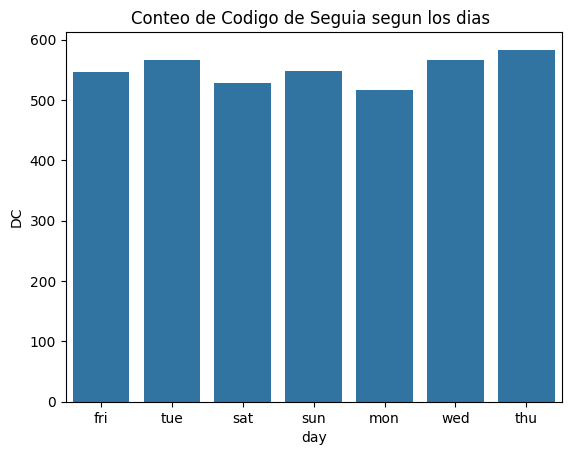

In [ ]:
# Crear el gráfico de barras sin barras de error
sns.barplot(x='day', y='DC', data=df, errorbar=None)
plt.title('Conteo de Codigo de Sequia segun los dias ')
plt.xlabel('day')
plt.ylabel('DC')
plt.show()

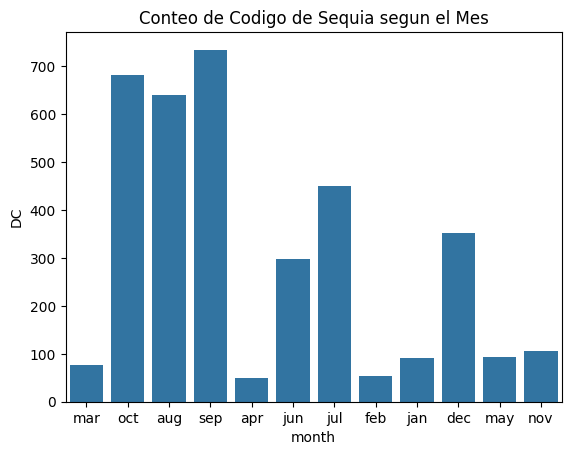

In [ ]:
# Conteo de Codigo de Sequia segun el Mes
sns.barplot(x='month', y='DC', data=df, errorbar=None)
plt.title('Conteo de Codigo de Sequia segun el Mes')
plt.xlabel('month')
plt.ylabel('DC')
plt.show()

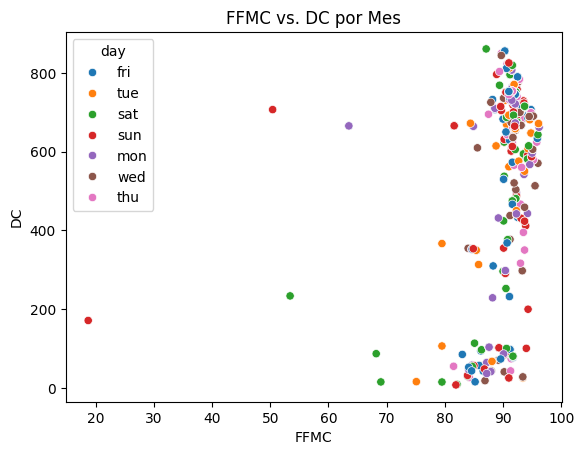

In [ ]:
# Relación entre la Lluvia y Area por el Mes
sns.scatterplot(x='FFMC', y='DC', hue='day', data=df)
plt.title('FFMC vs. DC por Mes')
plt.xlabel('FFMC')
plt.ylabel('DC')
plt.show()


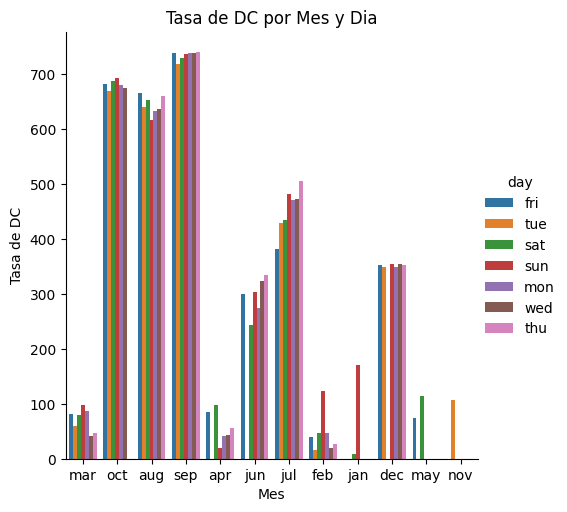

In [ ]:
# Relación entre el Mes, DC y ISI
sns.catplot(x='month', y='DC', hue='day', kind='bar', data=df, errorbar=None)
plt.title('Tasa de DC por Mes y Dia')
plt.xlabel('Mes')
plt.ylabel('Tasa de DC')
plt.show()

In [ ]:
# Porcentaje de missing por variable
df.isna().sum()/len(df)

X        0.0
Y        0.0
month    0.0
day      0.0
FFMC     0.0
DMC      0.0
DC       0.0
ISI      0.0
temp     0.0
RH       0.0
wind     0.0
rain     0.0
area     0.0
dtype: float64

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,1,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,1,1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,1,1,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,2,2,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,1,1,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.temp.describe()

count    517.000000
mean      18.889168
std        5.806625
min        2.200000
25%       15.500000
50%       19.300000
75%       22.800000
max       33.300000
Name: temp, dtype: float64

In [ ]:
df.temp.describe()

count    517.000000
mean      18.889168
std        5.806625
min        2.200000
25%       15.500000
50%       19.300000
75%       22.800000
max       33.300000
Name: temp, dtype: float64

In [ ]:
# Tratamiento de missing
df['X'] = df['X'].replace(np.nan,df['X'].mean())
df['X'] = np.where(df['X'].isnull(),'miss',df['X'])
df['month'] = df['month'].replace(np.nan,'miss')
df['month'] = np.where(df['month']=='miss','oct',df['month'])

In [ ]:
df.temp.value_counts(normalize=True)*100

temp
17.4    1.547389
19.6    1.547389
15.4    1.353965
20.6    1.353965
20.4    1.160542
          ...   
16.3    0.193424
12.8    0.193424
10.4    0.193424
8.7     0.193424
25.6    0.193424
Name: proportion, Length: 192, dtype: float64

In [ ]:
pd.crosstab(df.temp,df.day,normalize='index')*100

day,fri,mon,sat,sun,thu,tue,wed
temp,,,,,,,
2.2,100.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
4.2,0.0,0.000000,0.000000,100.0,0.0,0.000000,0.0
4.6,0.0,66.666667,16.666667,0.0,0.0,16.666667,0.0
4.8,0.0,0.000000,0.000000,100.0,0.0,0.000000,0.0
5.1,0.0,0.000000,20.000000,0.0,20.0,40.000000,20.0
...,...,...,...,...,...,...,...
32.3,0.0,0.000000,0.000000,0.0,0.0,100.000000,0.0
32.4,50.0,0.000000,0.000000,0.0,50.0,0.000000,0.0
32.6,0.0,100.000000,0.000000,0.0,0.0,0.000000,0.0


In [ ]:
# Codificar variables categóricas
label_encoder = LabelEncoder()

In [ ]:
df['month'] = label_encoder.fit_transform(df['month'])
df['day'] = label_encoder.fit_transform(df['day'])

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,1,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,1,1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,1,1,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,2,2,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,1,1,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,1,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,1,1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,1,1,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,2,2,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,1,1,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
pd.crosstab(df.X,df.Y)

Y,1,2
X,,
1,189,3
2,7,318


In [ ]:
# Eliminando las columnas innecesarias
df = df.drop(['Y'],axis=1)

In [ ]:
# Separar características y objetivo
X = df.drop('X', axis=1)
y = df['X']

In [ ]:
df.head()

,X,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,1,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,2,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,1,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
y

0      1
1      1
2      1
3      2
4      1
      ..
512    1
513    1
514    1
515    1
516    1
Name: X, Length: 517, dtype: int64

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape , X_test.shape

((413, 11), (104, 11))

In [ ]:
X.shape

(517, 11)

In [ ]:
# modelos - manera de trabajar es a través de distancias SVM SVB
# MODELO con diferente metodología Logistica - arboles - random forest -xgboost

In [ ]:
# Escalar características
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
X_train.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
329,11,2,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0,3.33
173,11,1,90.9,126.5,686.5,7.0,17.7,39,2.2,0.0,3.07
272,1,5,92.1,152.6,658.2,14.3,20.2,47,4.0,0.0,3.09
497,1,5,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68
182,3,3,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38


In [ ]:
X_train_sc

array([[ 1.17005658, -0.37741568,  0.28028558, ...,  0.00163124,
        -0.06781709, -0.17108721],
       [ 1.17005658, -0.9022395 ,  0.06165224, ..., -1.00892252,
        -0.06781709, -0.17678856],
       [-1.12340981,  1.19705578,  0.26346763, ...,  0.00163124,
        -0.06781709, -0.17634999],
       ...,
       [-1.12340981,  1.19705578,  0.26346763, ..., -0.50364564,
        -0.06781709, -0.23270564],
       [-0.20602325, -0.37741568,  0.04483429, ..., -1.23349003,
        -0.06781709, -0.24410834],
       [-1.12340981,  1.19705578,  0.71755226, ...,  0.00163124,
        -0.06781709, -0.24410834]])

**Modelado**

Se entrenaron los siguientes modelos de regresión:

- Linear Regression
- Ridge
- Lasso
- Decision Tree Regressor
- Random Forest Regressor
- XGBoost Regressor

Cada modelo fue evaluado utilizando:

- Mean Squared Error (MSE)
- R² Score

# Modelo de Clasificación (Target binaria)

## Modelo Logístico

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Entrenar el modelo
log_reg = LogisticRegression()
log_reg.fit(X_train_sc,y_train)


LogisticRegression()

In [ ]:
# Predecir y calcular métricas
y_pred = log_reg.predict(X_test_sc)
accuracy = accuracy_score(y_test,y_pred )
precision = precision_score(y_test, y_pred, average='weighted' )
recall = recall_score(y_test,y_pred, average='weighted', zero_division=1 )
f1 = f1_score(y_test,y_pred, average='weighted' )

# Predecir y calcular métricas
y_pred_t = log_reg.predict(X_train_sc)
accuracy_t = accuracy_score(y_train,y_pred_t )
precision_t = precision_score(y_train, y_pred_t, average='weighted')
recall_t = recall_score(y_train,y_pred_t, average='weighted' )
f1_t = f1_score(y_train,y_pred_t, average='weighted' )

print(f"Regresión Logística Prueba - accuracy: {accuracy}, Precisión: {precision}, Recall: {recall}, F1 Score: {f1}")
print(f"Regresión Logística train - accuracy: {accuracy_t}, Precisión: {precision_t}, Recall: {recall_t}, F1 Score: {f1_t}")

Regresión Logística Prueba - accuracy: 0.6057692307692307, Precisión: 0.5506993006993007, Recall: 0.6057692307692307, F1 Score: 0.5543728638981225
Regresión Logística train - accuracy: 0.6464891041162227, Precisión: 0.6274469569499733, Recall: 0.6464891041162227, F1 Score: 0.5949232853287045


In [ ]:
len(X_test)

104

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
pd.DataFrame(conf_matrix,columns=['0_pred','1_pred'],index=['0_real','1_real'])

,0_pred,1_pred
0_real,6,31
1_real,10,57


## accuracy

In [ ]:
(6+57)/(104)

0.6057692307692307

## Precisión

In [ ]:
57/(31 + 57)

0.6477272727272727

## Recall

In [ ]:
57/(10+57)

0.8507462686567164

In [ ]:
# Entrenar el modelo
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predecir y calcular métricas
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test,y_pred )
precision = precision_score(y_test,y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')
f1 = f1_score(y_test,y_pred, average='weighted')

y_pred_t = log_reg.predict(X_train)
accuracy_t = accuracy_score(y_train,y_pred_t )
precision_t = precision_score(y_train,y_pred_t, average='weighted' )
recall_t = recall_score(y_train, y_pred_t, average='weighted')
f1_t = f1_score(y_train, y_pred_t, average='weighted')

print(f"Regresión Logística Prueba - accuracy: {accuracy}, Precisión: {precision}, Recall: {recall}, F1 Score: {f1}")
print(f"Regresión Logística train - accuracy: {accuracy_t}, Precisión: {precision_t}, Recall: {recall_t}, F1 Score: {f1_t}")

Regresión Logística Prueba - accuracy: 0.5961538461538461, Precisión: 0.5402428876059708, Recall: 0.5961538461538461, F1 Score: 0.5475912975912975
Regresión Logística train - accuracy: 0.6319612590799032, Precisión: 0.602591103598459, Recall: 0.6319612590799032, F1 Score: 0.5720931199785897


Imagina que estás jugando un juego de adivinanzas:

* Árbol de Clasificación: Eres un adivinador que hace una serie de preguntas (¿Tiene plumas? ¿Vuela?) y, basándote en las respuestas, llegas a una conclusión (es un pájaro o no).
* Random Forest: Tienes un equipo de adivinadores, cada uno hace sus propias preguntas y toma su propia decisión. Luego, el equipo vota y la decisión final es la que tiene más votos.
* XGBoost: Tienes un adivinador principal y varios ayudantes. El adivinador principal hace preguntas y toma una decisión. Luego, los ayudantes analizan los errores del principal y ajustan sus preguntas para mejorar la precisión de la adivinanza.

## Arbol de Clasificación

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Entrenar el modelo
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_sc,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = tree_clf.predict(X_test)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Obtener las etiquetas originales de 'month'
labels = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, label_binarize
#Predecir y calcular métricas
y_pred = tree_clf.predict(X_test_sc)
accuracy = accuracy_score(y_test,y_pred )
precision = precision_score(y_test,y_pred, average='weighted' )
recall = recall_score(y_test,y_pred, average='weighted' )
f1 = f1_score(y_test,y_pred, average='weighted')
y_probs = tree_clf.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test,y_probs)
gini = 2 * auc_roc - 1

y_pred_t = tree_clf.predict(X_train_sc)
accuracy_t = accuracy_score(y_train,y_pred_t )
precision_t = precision_score(y_train, y_pred_t, average='weighted')
recall_t = recall_score(y_train,y_pred_t, average='weighted')
f1_t = f1_score(y_train,y_pred_t, average='weighted')
y_probs_t = tree_clf.predict_proba(X_train_sc)[:, 1]
auc_roc_t = roc_auc_score(y_train,y_probs_t )
gini_t = 2 * auc_roc_t - 1

print(f"Árbol de Decisión Prueba - accuracy: {accuracy}, Precisión: {precision}, Recall: {recall}, F1 Score: {f1}")
print(f"Árbol de Decisión TRAIN - accuracy: {accuracy_t}, Precisión: {precision_t}, Recall: {recall_t}, F1 Score: {f1_t}")

Árbol de Decisión Prueba - accuracy: 0.5769230769230769, Precisión: 0.582051282051282, Recall: 0.5769230769230769, F1 Score: 0.579284750337382
Árbol de Decisión TRAIN - accuracy: 0.9903147699757869, Precisión: 0.9905584235613017, Recall: 0.9903147699757869, F1 Score: 0.9903386264092163


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Entrenar el modelo
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
######predict
 #Saber quien 0 - 1
######predict_proba
# probabilidades

In [ ]:
# Predecir y calcular métricas
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred )
precision = precision_score(y_test,y_pred, average='weighted' )
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

y_probs = tree_clf.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_probs)
gini = 2 * auc_roc - 1

y_pred_t = tree_clf.predict(X_train)
accuracy_t = accuracy_score(y_train,y_pred_t )
precision_t = precision_score(y_train,y_pred_t, average='weighted' )
recall_t = recall_score(y_train,y_pred_t, average='weighted' )
f1_t = f1_score(y_train,y_pred_t, average='weighted' )

y_probs_t = tree_clf.predict_proba(X_train)[:, 1]
auc_roc_t = roc_auc_score(y_train, y_probs_t)
gini_t = 2 * auc_roc_t - 1

print(f"Árbol de Decisión - Precisión: {accuracy}, Precisión: {precision}, Recall: {recall}, F1 Score: {f1}, AUC: {auc_roc:4f}, GINI: {gini:4f}")
print(f"Árbol de Decisión - Precisión: {accuracy_t}, Precisión: {precision_t}, Recall: {recall_t}, F1 Score: {f1_t}, AUC: {auc_roc_t:4f}, GINI: {gini_t:4f}")

Árbol de Decisión - Precisión: 0.5673076923076923, Precisión: 0.5593810601163542, Recall: 0.5673076923076923, F1 Score: 0.5629038125439894, AUC: 0.517346, GINI: 0.034691
Árbol de Decisión - Precisión: 0.9903147699757869, Precisión: 0.9905584235613017, Recall: 0.9903147699757869, F1 Score: 0.9903386264092163, AUC: 0.999800, GINI: 0.999600


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo
forest_clf = RandomForestClassifier(n_estimators=50, random_state=42)
forest_clf.fit(X_train_sc,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
# Predecir y calcular métricas
y_pred = forest_clf.predict(X_test_sc)
accuracy = accuracy_score(y_test,y_pred )
precision = precision_score(y_test,y_pred, average='weighted' )
recall = recall_score(y_test,y_pred, average='weighted' )
f1 = f1_score(y_test,y_pred, average='weighted' )

y_probs = forest_clf.predict_proba(X_test_sc)[:, 1]
auc_roc = roc_auc_score(y_test,y_probs )
gini = 2 * auc_roc - 1

y_pred_t = forest_clf.predict(X_train_sc)
accuracy_t = accuracy_score(y_train,y_pred_t )
precision_t = precision_score(y_train,y_pred_t, average='weighted' )
recall_t = recall_score(y_train,y_pred_t, average='weighted' )
f1_t = f1_score(y_train,y_pred_t, average='weighted' )

y_probs_t = forest_clf.predict_proba(X_train_sc)[:, 1]
auc_roc_t = roc_auc_score(y_train,y_probs_t )
gini_t = 2 * auc_roc_t - 1

print(f"Random Forest test - Precisión: {accuracy}, Precisión: {precision}, Recall: {recall}, F1 Score: {f1}, AUC: {auc_roc:4f}, GINI: {gini:4f}")
print(f"Random Forest train - Precisión: {accuracy_t}, Precisión: {precision_t}, Recall: {recall_t}, F1 Score: {f1_t}, AUC: {auc_roc_t:4f}, GINI: {gini_t:4f}")

Random Forest test - Precisión: 0.5769230769230769, Precisión: 0.5717948717948718, Recall: 0.5769230769230769, F1 Score: 0.5741578682755153, AUC: 0.580678, GINI: 0.161355
Random Forest train - Precisión: 0.9903147699757869, Precisión: 0.9903147699757869, Recall: 0.9903147699757869, F1 Score: 0.9903147699757869, AUC: 0.999775, GINI: 0.999550


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo
forest_clf = RandomForestClassifier(n_estimators=50, random_state=42)
forest_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
# Predecir y calcular métricas
y_pred = forest_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred )
precision = precision_score(y_test,y_pred, average='weighted' )
recall = recall_score(y_test,y_pred, average='weighted' )
f1 = f1_score(y_test,y_pred, average='weighted' )

y_probs = forest_clf.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test,y_probs )
gini = 2 * auc_roc - 1

y_pred_t = forest_clf.predict(X_train)
accuracy_t = accuracy_score(y_train,y_pred_t )
precision_t = precision_score(y_train,y_pred_t, average='weighted' )
recall_t = recall_score(y_train,y_pred_t, average='weighted' )
f1_t = f1_score(y_train,y_pred_t, average='weighted' )

y_probs_t = forest_clf.predict_proba(X_train)[:, 1]
auc_roc_t = roc_auc_score(y_train,y_probs_t )
gini_t = 2 * auc_roc_t - 1

print(f"Random Forest test - Precisión: {accuracy}, Precisión: {precision}, Recall: {recall}, F1 Score: {f1}, AUC: {auc_roc:4f}, GINI: {gini:4f}")
print(f"Random Forest train - Precisión: {accuracy_t}, Precisión: {precision_t}, Recall: {recall_t}, F1 Score: {f1_t}, AUC: {auc_roc_t:4f}, GINI: {gini_t:4f}")

Random Forest test - Precisión: 0.5769230769230769, Precisión: 0.5717948717948718, Recall: 0.5769230769230769, F1 Score: 0.5741578682755153, AUC: 0.582291, GINI: 0.164582
Random Forest train - Precisión: 0.9903147699757869, Precisión: 0.9903147699757869, Recall: 0.9903147699757869, F1 Score: 0.9903147699757869, AUC: 0.999775, GINI: 0.999550


## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Entrenar el modelo
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_sc,y_train - 1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Predecir y calcular métricas

y_pred = xgb_clf.predict(X_test_sc)
accuracy = accuracy_score(y_test,y_pred )
precision = precision_score(y_test,y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')
f1 = f1_score(y_test,y_pred, average='macro',)

y_probs = xgb_clf.predict_proba(X_test_sc)[:, 1]
auc_roc = roc_auc_score(y_test,y_probs )
gini = 2 * auc_roc - 1

y_pred_t = xgb_clf.predict(X_train_sc)
accuracy_t = accuracy_score(y_train,y_pred_t )
precision_t = precision_score(y_train,y_pred_t, average='macro')
recall_t = recall_score(y_train,y_pred_t, average='macro')
f1_t = f1_score(y_train,y_pred_t, average='macro')

y_probs_t = xgb_clf.predict_proba(X_train_sc)[:, 1]
auc_roc_t = roc_auc_score(y_train,y_probs_t )
gini_t = 2 * auc_roc_t - 1

print(f"XGBoost test - Precisión: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, AUC: {auc_roc:4f}, GINI: {gini:4f}")
print(f"XGBoost train - Precisión: {accuracy_t:.4f}, Precision: {precision_t:.4f}, Recall: {recall_t:.4f}, F1 Score: {f1_t:.4f}, AUC: {auc_roc_t:4f}, GINI: {gini_t:4f}")

XGBoost test - Precisión: 0.1154, Precision: 0.1290, Recall: 0.1081, F1 Score: 0.1176, AUC: 0.484470, GINI: -0.031061
XGBoost train - Precisión: 0.1041, Precision: 0.1175, Recall: 0.0925, F1 Score: 0.1035, AUC: 0.521318, GINI: 0.042636


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Entrenar el modelo
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train - 1)

# Predecir y calcular métricas
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
y_probs = xgb_clf.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_probs)
gini = 2 * auc_roc - 1

y_pred_t = xgb_clf.predict(X_train)
accuracy_t = accuracy_score(y_train, y_pred_t)
precision_t = precision_score(y_train, y_pred_t, average='macro')
recall_t = recall_score(y_train, y_pred_t, average='macro')
f1_t = f1_score(y_train, y_pred_t, average='macro')
y_probs_t = xgb_clf.predict_proba(X_train)[:, 1]
auc_roc_t = roc_auc_score(y_train, y_probs_t)
gini_t = 2 * auc_roc_t - 1

print(f"XGBoost test - Precisión: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, AUC: {auc_roc:4f}, GINI: {gini:4f}")
print(f"XGBoost train - Precisión: {accuracy_t:.4f}, Precision: {precision_t:.4f}, Recall: {recall_t:.4f}, F1 Score: {f1_t:.4f}, AUC: {auc_roc_t:4f}, GINI: {gini_t:4f}")

XGBoost test - Precisión: 0.2404, Precision: 0.1244, Recall: 0.2252, F1 Score: 0.1603, AUC: 0.551835, GINI: 0.103671
XGBoost train - Precisión: 0.0048, Precision: 0.0026, Recall: 0.0043, F1 Score: 0.0032, AUC: 0.999800, GINI: 0.999600


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

In [ ]:
# Incrementar el volumen de la data
# Jugar con los valores de los hiperparametros
# Mejoras con IA GENERATIVA - CTGANS -te permite trabajar con data sintética

# Modelo de Regresión (Target continua)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Cargar el conjunto de datos de Breast Cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Crear un DataFrame para una mejor visualización
df = pd.DataFrame(X, columns=california.feature_names)
df['mean_perimeter'] = y

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,mean_perimeter
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Diccionario de la Base de Datos de Boston Housing

| Atributo | Descripción |
| --- | --- |
| **CRIM** | Tasa de criminalidad per cápita por ciudad |
| **ZN** | Proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados |
| **INDUS** | Proporción de acres de negocios no minoristas por ciudad |
| **CHAS** | Variable ficticia de Charles River (1 si el tramo limita con el río; 0 en caso contrario) |
| **NOX** | Concentración de óxidos nítricos (partes por 10 millones) |
| **RM** | Número medio de habitaciones por vivienda |
| **AGE** | Proporción de unidades ocupadas por sus propietarios construidas antes de 1940 |
| **DIS** | Distancias ponderadas a cinco centros de empleo en Boston |
| **RAD** | Índice de accesibilidad a las autopistas radiales |
| **TAX** | Tasa de impuesto a la propiedad de valor total por 10,000 |
| **PTRATIO** | Proporción alumno-maestro por ciudad |
| **B** | $(1000(Bk - 0.63)^2$) donde (Bk) es la proporción de residentes negros por ciudad |
| **LSTAT** | Porcentaje de población con menor estatus socioeconómico |
| **PRICE** | Valor medio de las viviendas ocupadas por sus propietarios en $1000s |

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.isna().sum()/len(df)

mean radius                0.0
mean texture               0.0
mean perimeter             0.0
mean area                  0.0
mean smoothness            0.0
mean compactness           0.0
mean concavity             0.0
mean concave points        0.0
mean symmetry              0.0
mean fractal dimension     0.0
radius error               0.0
texture error              0.0
perimeter error            0.0
area error                 0.0
smoothness error           0.0
compactness error          0.0
concavity error            0.0
concave points error       0.0
symmetry error             0.0
fractal dimension error    0.0
worst radius               0.0
worst texture              0.0
worst perimeter            0.0
worst area                 0.0
worst smoothness           0.0
worst compactness          0.0
worst concavity            0.0
worst concave points       0.0
worst symmetry             0.0
worst fractal dimension    0.0
mean_perimeter             0.0
dtype: float64

In [ ]:
X = df.drop(['mean_perimeter'],axis=1)
y = df['mean_perimeter']

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: mean_perimeter, dtype: int64

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd

results = pd.DataFrame({
    "Modelo": ["Linear", "Ridge", "Lasso", "Decision Tree", "Random Forest", "XGBoost"],
    "MSE Test": [mse_linear, mse_ridge, mse_lasso, mse_tree, mse_rf, mse_xgb],
    "R2 Test": [r2_linear, r2_ridge, r2_lasso, r2_tree, r2_rf, r2_xgb]
})

results.sort_values(by="R2 Test", ascending=False)

**Comparación de Modelos**

Se compararon los modelos en función del error (MSE) y la capacidad explicativa (R²).

Un menor MSE indica mejor precisión en la predicción.
Un mayor R² indica mejor capacidad para explicar la variabilidad del precio.

## Regresión Lineal

In [ ]:
# y = a1*X1 + a2*X2 + a3*X3 + a4

In [ ]:
lineal = LinearRegression()
lineal.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Predicciones
y_pred = lineal.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

y_pred_t = lineal.predict(X_train)
mse_t = mean_squared_error(y_train, y_pred_t)
r2_t = r2_score(y_train, y_pred_t)

print(f"Lineal test - mse: {mse:.4f}, r2: {r2:.4f}")
print(f"Lineal train - mse: {mse_t:.4f}, r2: {r2_t:.4f}")

Lineal test - mse: 0.0641, r2: 0.7271
Lineal train - mse: 0.0516, r2: 0.7790


<ipython-input-42-d44b30d70e35>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Valores Reales', shade=True, color='blue')
<ipython-input-42-d44b30d70e35>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Valores Predichos', shade=True, color='orange')


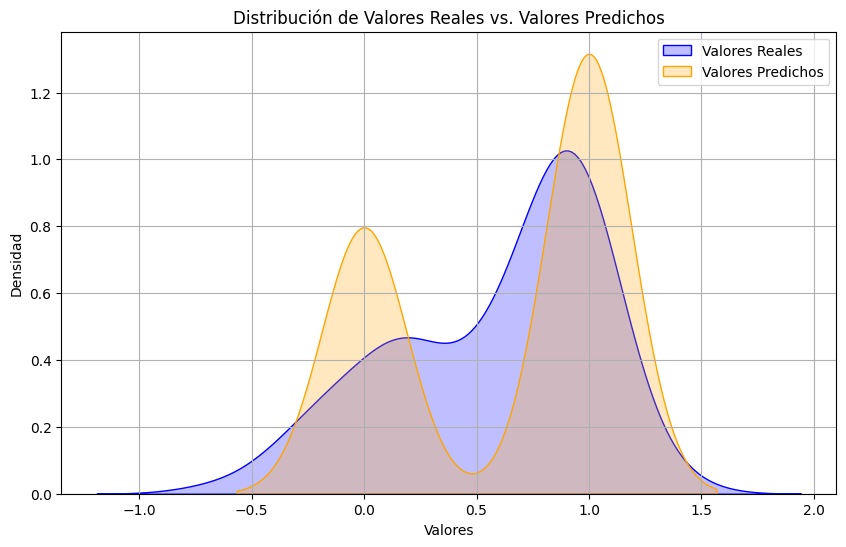

In [ ]:
# Crear la gráfica de densidad para la variable real vs. la inferida
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred, label='Valores Reales', shade=True, color='blue')
sns.kdeplot(y_test, label='Valores Predichos', shade=True, color='orange')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Distribución de Valores Reales vs. Valores Predichos')
plt.legend()
plt.grid(True)
plt.show()

## Regresión Ridge

In [ ]:
# y = a1*X1 + a2*X2 + a3*X3 + a4

In [ ]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5)

In [ ]:
#Predicciones
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

y_pred_t = ridge.predict(X_train)
mse_t = mean_squared_error(y_train, y_pred_t)
r2_t = r2_score(y_train, y_pred_t)

print(f"Rigde test - mse: {mse:.4f}, r2: {r2:.4f}")
print(f"Rigde train - mse: {mse_t:.4f}, r2: {r2_t:.4f}")

Rigde test - mse: 0.0585, r2: 0.7509
Rigde train - mse: 0.0589, r2: 0.7476


<ipython-input-44-d44b30d70e35>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Valores Reales', shade=True, color='blue')
<ipython-input-44-d44b30d70e35>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Valores Predichos', shade=True, color='orange')


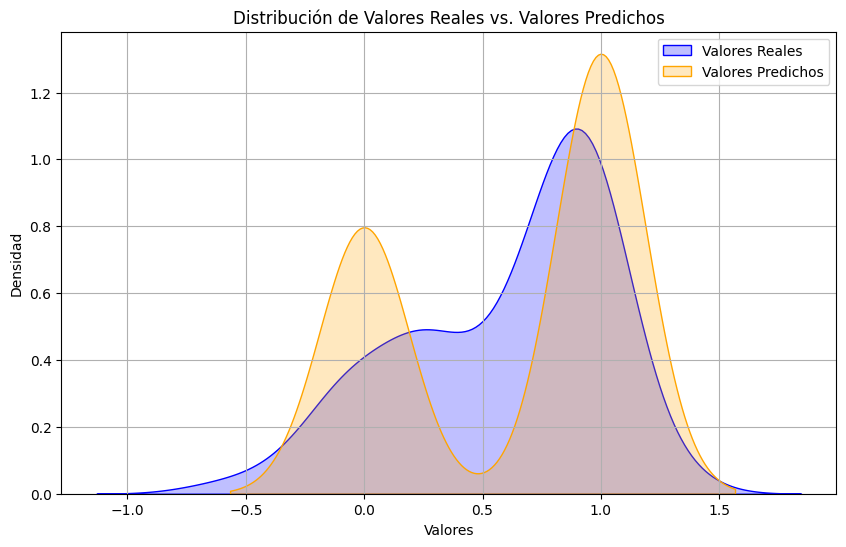

In [ ]:
# Crear la gráfica de densidad para la variable real vs. la inferida
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred, label='Valores Reales', shade=True, color='blue')
sns.kdeplot(y_test, label='Valores Predichos', shade=True, color='orange')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Distribución de Valores Reales vs. Valores Predichos')
plt.legend()
plt.grid(True)
plt.show()

## Regresión Lasso

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [ ]:
#Predicciones
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

y_pred_t = lasso.predict(X_train)
mse_t = mean_squared_error(y_train, y_pred_t)
r2_t = r2_score(y_train, y_pred_t)

print(f"Lasso test - mse: {mse:.4f}, r2: {r2:.4f}")
print(f"Lasso train - mse: {mse_t:.4f}, r2: {r2_t:.4f}")

Lasso test - mse: 0.0730, r2: 0.6894
Lasso train - mse: 0.0784, r2: 0.6641


<ipython-input-29-d44b30d70e35>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Valores Reales', shade=True, color='blue')
<ipython-input-29-d44b30d70e35>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Valores Predichos', shade=True, color='orange')


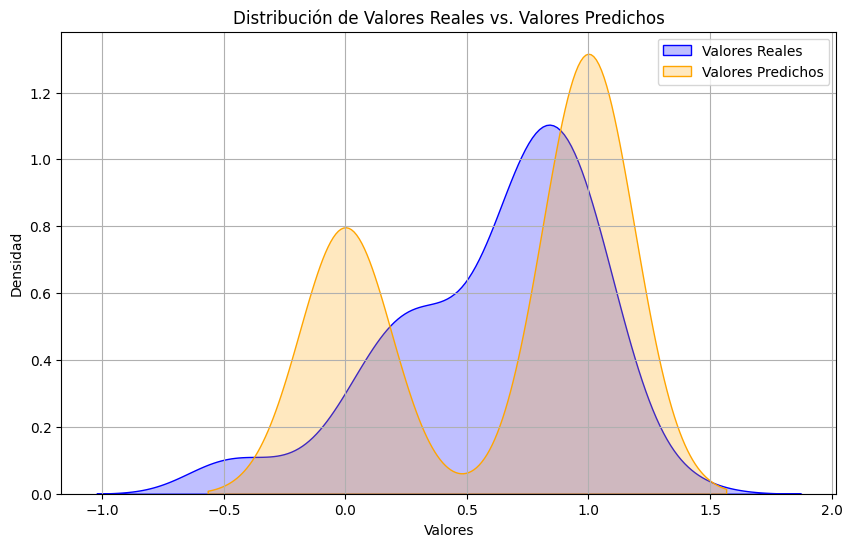

In [ ]:
# Crear la gráfica de densidad para la variable real vs. la inferida
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred, label='Valores Reales', shade=True, color='blue')
sns.kdeplot(y_test, label='Valores Predichos', shade=True, color='orange')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Distribución de Valores Reales vs. Valores Predichos')
plt.legend()
plt.grid(True)
plt.show()

## Arbol para Regresión

In [ ]:
arbol = DecisionTreeRegressor(random_state=42)
arbol.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
#Predicciones
y_pred = arbol.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

y_pred_t = arbol.predict(X_train)
mse_t = mean_squared_error(y_train, y_pred_t)
r2_t = r2_score(y_train, y_pred_t)

print(f"Arbol test - mse: {mse:.4f}, r2: {r2:.4f}")
print(f"Arbol train - mse: {mse_t:.4f}, r2: {r2_t:.4f}")

Arbol test - mse: 0.0526, r2: 0.7760
Arbol train - mse: 0.0000, r2: 1.0000


<ipython-input-32-d44b30d70e35>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Valores Reales', shade=True, color='blue')
<ipython-input-32-d44b30d70e35>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Valores Predichos', shade=True, color='orange')


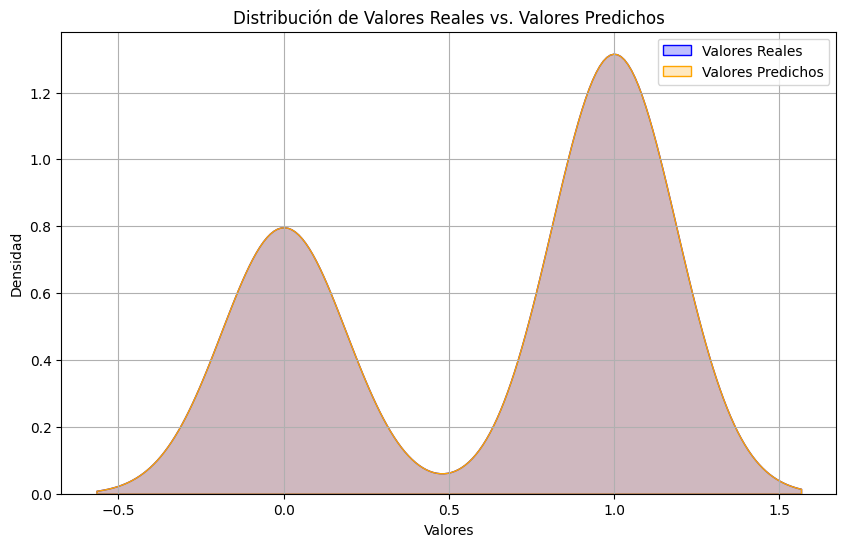

In [ ]:
# Crear la gráfica de densidad para la variable real vs. la inferida
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred, label='Valores Reales', shade=True, color='blue')
sns.kdeplot(y_test, label='Valores Predichos', shade=True, color='orange')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Distribución de Valores Reales vs. Valores Predichos')
plt.legend()
plt.grid(True)
plt.show()

## Ranfom Forest para Regresión

In [ ]:
random = RandomForestRegressor(n_estimators=50, random_state=42)
random.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
#Predicciones
y_pred = random.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

y_pred_t = random.predict(X_train)
mse_t = mean_squared_error(y_train, y_pred_t)
r2_t = r2_score(y_train, y_pred_t)

print(f"Random Forest test - mse: {mse:.4f}, r2: {r2:.4f}")
print(f"Random Forest train - mse: {mse_t:.4f}, r2: {r2_t:.4f}")

Random Forest test - mse: 0.0332, r2: 0.8588
Random Forest train - mse: 0.0053, r2: 0.9771


<ipython-input-35-d44b30d70e35>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Valores Reales', shade=True, color='blue')
<ipython-input-35-d44b30d70e35>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Valores Predichos', shade=True, color='orange')


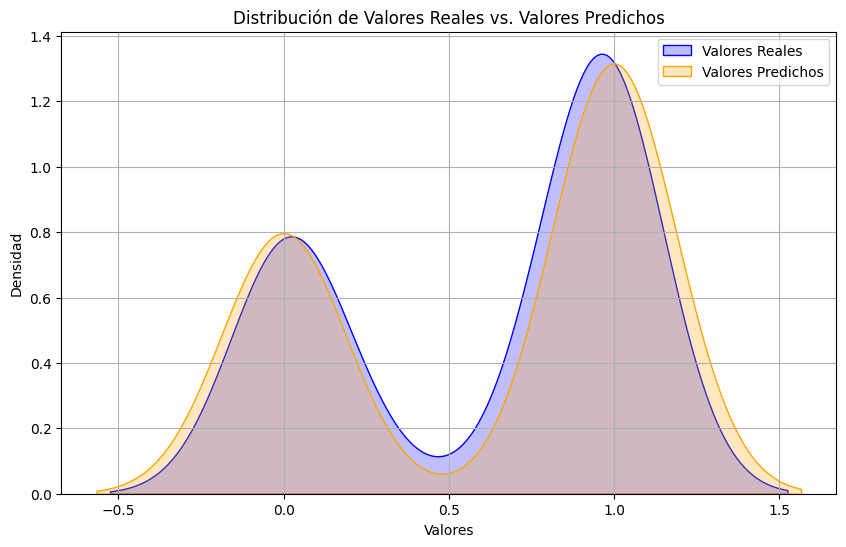

In [ ]:
# Crear la gráfica de densidad para la variable real vs. la inferida
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred, label='Valores Reales', shade=True, color='blue')
sns.kdeplot(y_test, label='Valores Predichos', shade=True, color='orange')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Distribución de Valores Reales vs. Valores Predichos')
plt.legend()
plt.grid(True)
plt.show()

## XGboost para Regresión

In [ ]:
xgboost = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42,
                           max_depth=6,
                           learning_rate=0.300000012)
xgboost.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.300000012,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
#Predicciones
y_pred = xgboost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

y_pred_t = xgboost.predict(X_train)
mse_t = mean_squared_error(y_train, y_pred_t)
r2_t = r2_score(y_train, y_pred_t)

print(f"XGboost test - mse: {mse:.4f}, r2: {r2:.4f}")
print(f"XGboost train - mse: {mse_t:.4f}, r2: {r2_t:.4f}")

XGboost test - mse: 0.0487, r2: 0.7927
XGboost train - mse: 0.0000, r2: 1.0000


<ipython-input-38-1a853d18e456>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_t, label='Valores Reales', shade=True, color='blue')
<ipython-input-38-1a853d18e456>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train, label='Valores Predichos', shade=True, color='orange')


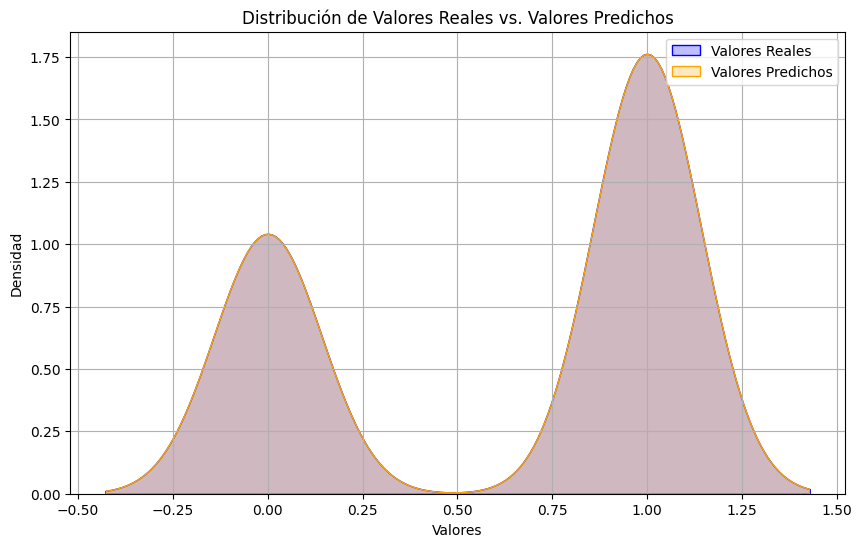

In [ ]:
# Crear la gráfica de densidad para la variable real vs. la inferida
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred_t, label='Valores Reales', shade=True, color='blue')
sns.kdeplot(y_train, label='Valores Predichos', shade=True, color='orange')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Distribución de Valores Reales vs. Valores Predichos')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-39-d44b30d70e35>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Valores Reales', shade=True, color='blue')
<ipython-input-39-d44b30d70e35>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Valores Predichos', shade=True, color='orange')


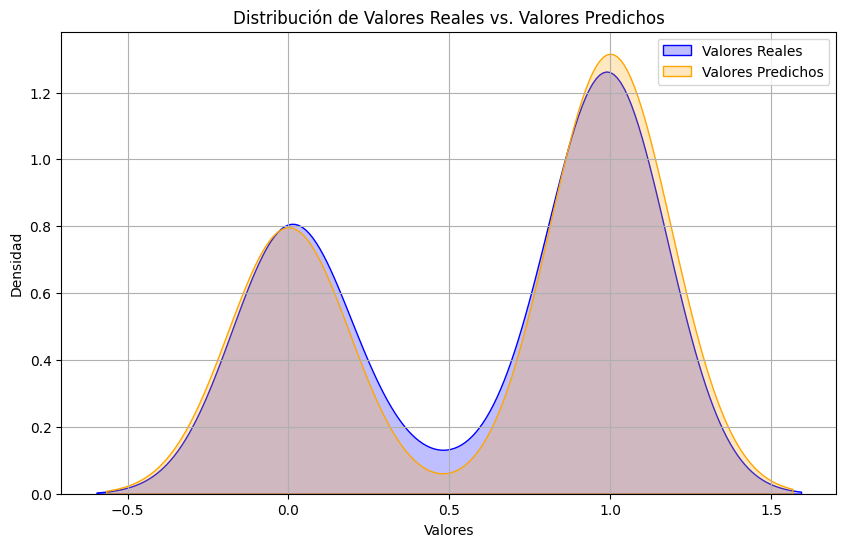

In [ ]:
# Crear la gráfica de densidad para la variable real vs. la inferida
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred, label='Valores Reales', shade=True, color='blue')
sns.kdeplot(y_test, label='Valores Predichos', shade=True, color='orange')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Distribución de Valores Reales vs. Valores Predichos')
plt.legend()
plt.grid(True)
plt.show()

**Conclusiones**

Tras la comparación de modelos, se observó que el modelo **XGBOOST**
presentó el mejor desempeño en el conjunto de prueba, con:

- Menor MSE
- Mayor R²
- Diferencia reducida entre entrenamiento y prueba (menor sobreajuste)

Esto sugiere que el modelo tiene mejor capacidad de generalización y captura relaciones no lineales presentes en el dataset.

Los modelos lineales mostraron desempeño competitivo, pero fueron superados por modelos de ensamble como Random Forest o XGBoost, que logran capturar interacciones más complejas entre variables.

Este análisis demuestra la importancia de comparar múltiples enfoques antes de seleccionar un modelo final en un entorno productivo.